In [1]:
from src.evaluation import *

/home/giovanni/.virtualenvs/news_clf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
results, hyperparams = evaluate(version=1)

Beginning shapes: 
Xtr_val: (63997, 5) | X_test: (16000, 5) | ytr_val: (63997,) | y_test: (16000,)
Prep shapes: 
Xtr_val: (63996, 6666) | X_test: (16000, 6666) | ytr_val: (63996,) | y_test: (16000,)


Best trial: 3. Best value: 0.614039: 100%|██████████| 10/10 [27:56<00:00, 167.62s/it]


In [4]:
results

,Precision,Recall,Fbeta,Accuracy,f1-macro,time
linear_svm,0.63639,0.594074,0.600201,0.632563,0.600201,54.509002
xgboost,0.65293,0.622288,0.634860,0.653125,0.634860,1749.966434


In [8]:
results.to_dict()

{'Precision': {'linear_svm': 0.6363895756829131,
  'xgboost': 0.6529303291604106},
 'Recall': {'linear_svm': 0.5940743209348611, 'xgboost': 0.6222883670816721},
 'Fbeta': {'linear_svm': 0.6002013979153824, 'xgboost': 0.6348600760443152},
 'Accuracy': {'linear_svm': 0.6325625, 'xgboost': 0.653125},
 'f1-macro': {'linear_svm': 0.6002013979153824, 'xgboost': 0.6348600760443152},
 'time': {'linear_svm': 54.50900173187256, 'xgboost': 1749.9664335250854}}

In [5]:
hyperparams

{'linear_svm': {'C': 6.663520926844875, 'max_iter': 5000},
 'xgboost': {'objective': 'multi:softprob',
  'num_class': 7,
  'tree_method': 'hist',
  'n_jobs': -1,
  'learning_rate': 0.14300309514812126,
  'n_estimators': 700,
  'max_depth': 5,
  'min_child_weight': 3,
  'subsample': 0.7803692476011997,
  'colsample_bytree': 0.5815469732683555,
  'gamma': 0.05727022330707218,
  'reg_alpha': 0.2336308089104474,
  'reg_lambda': 1.7931095438689504}}

In [2]:
hyperparams = {'objective': 'multi:softprob',
  'num_class': 7,
  'tree_method': 'hist',
  'n_jobs': -1,
  'learning_rate': 0.14300309514812126,
  'n_estimators': 700,
  'max_depth': 5,
  'min_child_weight': 3,
  'subsample': 0.7803692476011997,
  'colsample_bytree': 0.5815469732683555,
  'gamma': 0.05727022330707218,
  'reg_alpha': 0.2336308089104474,
  'reg_lambda': 1.7931095438689504}

res = performance('xgboost', hyperparams)

In [3]:
res

{'Precision_macro': 0.6529303291604106,
 'Recall_macro': 0.6222883670816721,
 'f1-macro': 0.6348600760443152,
 'f1-micro': 0.653125,
 'Accuracy': 0.653125,
 'Balanced_accuracy': 0.6222883670816721,
 'Per_class': {'precision': array([0.64491264, 0.73883162, 0.84097859, 0.48594848, 0.74877451,
         0.50308099, 0.60798548]),
  'recall': array([0.79953281, 0.71057602, 0.73924731, 0.4160401 , 0.71253644,
         0.43776331, 0.54032258]),
  'f1': array([0.71394709, 0.7244284 , 0.78683834, 0.44828517, 0.73020615,
         0.46815482, 0.57216055]),
  'support': array([4709, 2118, 2232, 1995, 1715, 2611,  620])},
 'Confusion_matrix': array([[3765,  120,   51,  175,   60,  483,   55],
        [ 236, 1505,   88,  108,   29,  122,   30],
        [ 223,  112, 1650,  120,   40,   65,   22],
        [ 477,  124,   82,  830,  153,  286,   43],
        [ 191,   16,    5,  164, 1222,  113,    4],
        [ 842,  133,   69,  246,  116, 1143,   62],
        [ 104,   27,   17,   65,   12,   60,  335]]

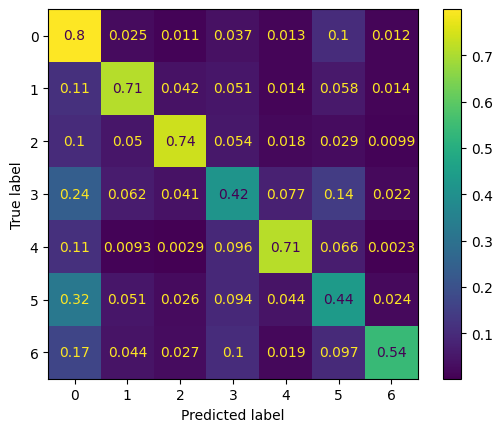

In [9]:
cm = res['Confusion_matrix']
cm_norm = cm / cm.sum(axis=1, keepdims=True)
cm_norm
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=range(0,7))

disp.plot()

0.645